Import relevant libraries

In [208]:
import csv
import datetime
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Read CSV file with stock data

In [209]:
def get_csv_file(fname):
    csv_file = open(fname, 'r', encoding='cp1252')
    try:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_headers = next(csv_reader)
    except:
        csv_reader = None
        csv_headers = None
    if csv_headers is None or csv_reader is None:
        raise IOError("Couldn't read CSV file")
    return csv_headers, csv_reader

Determine what the most common day of the week for a breach notification to be issues is.

In [242]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")

days_of_week_index = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df = pd.DataFrame({"Day of Week": days_of_week_index, "Public Breach": [0, 0, 0, 0, 0, 0, 0], "Private Breach": [0, 0, 0, 0, 0, 0, 0] })

# Iterate through all publication dates
for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    # skip entries without pubdatyes
    if pub_date is '':
        continue
    # convert the date to a datetime and then get the day of week (0-6 value)
    pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
    
    if is_public == "TRUE":
        df.loc[pub_date.weekday(), "Public Breach"] += 1
    else:
        df.loc[pub_date.weekday(), "Private Breach"] += 1
print(df)

  Day of Week  Public Breach  Private Breach
0      Monday             95             462
1     Tuesday             74             499
2   Wednesday             83             493
3    Thursday             87             515
4      Friday            100             577
5    Saturday             24             188
6      Sunday             19             139


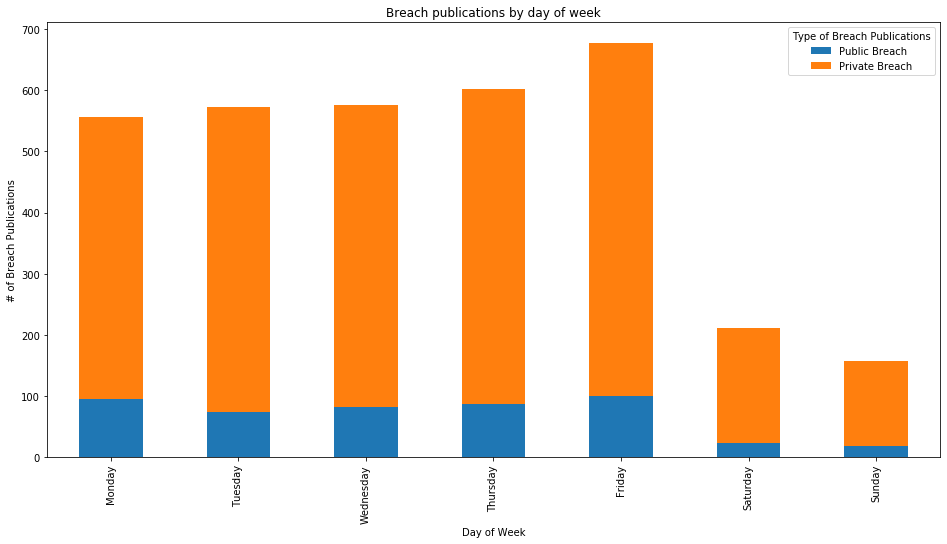

In [253]:
# Change the output image size
#plt.rcParams['figure.figsize'] = [10, 5]
# Generate our bar graph
#ax = df.plot.bar(x='Day of Week', y='# of Breach Publications', rot=0)
#plt.ylabel('# of Breach Publications')
#plt.title('Public Company Breach Publications by Day of the Week')
df.loc[:,df.columns].plot.bar(x="Day of Week", stacked=True, figsize=(16,8))
plt.ylabel('# of Breach Publications')
plt.xlabel('Day of Week')
plt.legend(title="Type of Breach Publications")
plt.title('Breach publications by day of week')
plt.savefig('images/breach-publications-by-day-of-week.png', bbox_inches='tight', dpi=300)

In [269]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")

# use a set to only identify each element once
years = set()

# Get the number of years
for breach in csv_reader:
    pub_date = breach[pub_index]
    # skip entries without pubdatyes
    if pub_date is '':
        continue
    # convert the date to a datetime and then get the day of week (0-6 value)
    pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
    years.add(pub_date.year)

# sort our years
years = list(years)
years.sort()

days_of_week_index = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']


breach_numbers_dict = {}
for year in years:
    breach_numbers_dict[year] = [0, 0, 0, 0, 0, 0, 0]
    
# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    
    # skip entries without pubdatyes
    if pub_date is '':
        continue
    # convert the date to a datetime and then get the day of week (0-6 value)
    pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
    
    if is_public == "TRUE":
        breach_numbers_dict[pub_date.year][pub_date.weekday()] += 1

breach_years = []
breach_days_of_week = []
breach_numbers = []
# Flatten our dict into the forms needed
for year, year_data in breach_numbers_dict.items():
    for day_of_week in range(0,len(year_data)):
        breach_years.append(year)
        breach_days_of_week.append(days_of_week_index[day_of_week])
        breach_numbers.append(year_data[day_of_week])

rows = zip(breach_years, breach_days_of_week, breach_numbers)
headers = ['Year', 'Day Of Week', '# of Breach Notifications']
df = pd.DataFrame(rows, columns=headers)
pivot_df = df.pivot(index='Year', columns='Day Of Week', values='# of Breach Notifications')
print(pivot_df)




Day Of Week  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
Year                                                                       
2001              0       0         0       0         0        0          0
2002              0       0         0       0         0        0          0
2003              0       0         0       0         0        0          0
2004              0       0         0       0         0        0          1
2005              1       0         0       1         1        0          1
2006              0       1         0       1         2        0          0
2007              3       3         1       0         0        2          3
2008              2       3         1       0         2        3          2
2009              3       1         0       0         2        3          1
2010              3       1         0       0         1        0          2
2011              4       2         2       2         4        0          2
2012        

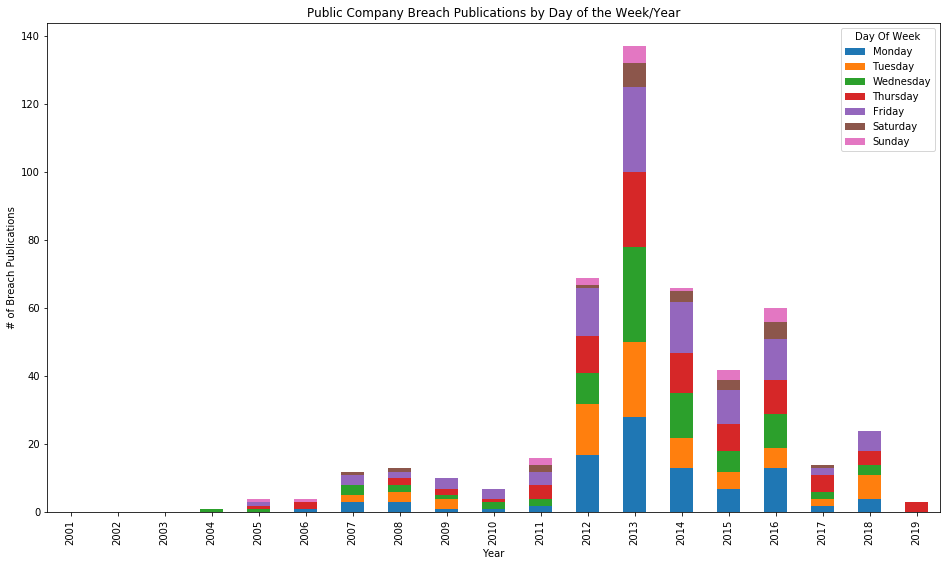

In [271]:
pivot_df.loc[:,days_of_week_index].plot.bar(stacked=True, figsize=(16,9))
plt.ylabel('# of Breach Publications')
plt.title('Public Company Breach Publications by Day of the Week/Year')
plt.savefig('images/public-breaches-by-year-and-day-of-week.png', bbox_inches='tight', dpi=300)

Total Number of Breaches per Year

In [214]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
public_year_index = csv_headers.index("Year")
in_scope_index = csv_headers.index("In_Scope")

breaches_by_year = {}

# use a set to only identify each element once
years = set()

# Get the number of years
for breach in csv_reader:
    pub_date = breach[pub_index]
    # skip entries without pubdatyes
    if pub_date is '':
        continue
    # convert the date to a datetime and then get the year
    pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
    years.add(str(pub_date.year))

# sort our years
years = list(years)
years.sort()

# prepoulate our dicts
for year in years:
    breaches_by_year[year] = [0,0]
    
# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    public_year = breach[public_year_index]
    is_in_scope = breach[in_scope_index]
    if is_public == "TRUE" and pub_date is not "":
        pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
        if is_in_scope == "TRUE":
            breaches_by_year[str(pub_date.year)][0] += 1
        else:
            # convert the date to a datetime and then get the year
            breaches_by_year[str(pub_date.year)][1] += 1
        
# convert into the format needed for dataframe
breach_datapoint = []
# Flatten our dict into the forms needed
for year, size_data in breaches_by_year.items():
    breach_datapoint.append([year] + size_data)

headers = ['Year', "In Scope", "Out of Scope"]
df = pd.DataFrame(breach_datapoint, columns=headers)
print(df)
print(df.sum())
    
#breaches_by_year = pd.DataFrame(breaches_by_year.items(), columns=['Year', '# of Breaches'])
    
#print(breaches_by_year)

    Year  In Scope  Out of Scope
0   2001         0             0
1   2002         0             0
2   2003         0             0
3   2004         1             0
4   2005         4             0
5   2006         3             1
6   2007         8             4
7   2008        10             3
8   2009         4             6
9   2010         3             4
10  2011         8             8
11  2012        25            44
12  2013        30           107
13  2014        20            46
14  2015         9            33
15  2016         9            51
16  2017         6             8
17  2018        11            13
18  2019         1             2
Year            2.001200e+75
In Scope        1.520000e+02
Out of Scope    3.300000e+02
dtype: float64


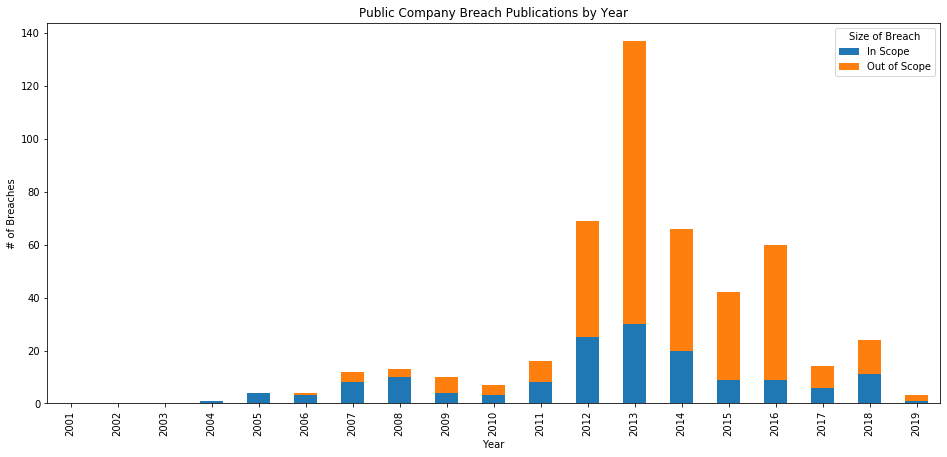

In [215]:



df.loc[:,headers].plot.bar(x="Year", stacked=True, figsize=(16,7))
plt.ylabel('# of Breaches')
plt.xlabel('Year')
plt.legend(title="Size of Breach")
plt.title('Public Company Breach Publications by Year')
plt.savefig('images/public-breaches-in-versus-out-of-scope.png', bbox_inches='tight', dpi=300)

Total Number of Breaches per Year over Public Breaches

In [216]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
public_year_index = csv_headers.index("Year")
in_scope_index = csv_headers.index("In_Scope")



public_breaches_by_year = {}
total_breaches_by_year = {}

# use a set to only identify each element once
years = set()

# Get the number of years
for breach in csv_reader:
    pub_date = breach[pub_index]
    # skip entries without pubdatyes
    if pub_date is '':
        continue
    # convert the date to a datetime and then get the year
    pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
    years.add(str(pub_date.year))

# sort our years
years = list(years)
years.sort()

# prepoulate our dicts
for year in years:
    public_breaches_by_year[year] = 0
    total_breaches_by_year[year] = 0

# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    public_year = breach[public_year_index]
    is_in_scope = breach[in_scope_index]
    
    if is_public == "TRUE" and pub_date is not "" and is_in_scope == "TRUE":
        # convert the date to a datetime and then get the year
        pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
        public_breaches_by_year[str(pub_date.year)] += 1
        total_breaches_by_year[str(pub_date.year)] += 1
    else:
        total_breaches_by_year[public_year] += 1

total_breaches_by_year = pd.DataFrame(total_breaches_by_year.items(), columns=['Year', '# of Breaches'])
public_breaches_by_year = pd.DataFrame(public_breaches_by_year.items(), columns=['Year', '# of Breaches'])

print(total_breaches_by_year)
print(public_breaches_by_year)

    Year  # of Breaches
0   2001              1
1   2002              0
2   2003              2
3   2004              5
4   2005             10
5   2006             12
6   2007             27
7   2008             44
8   2009             30
9   2010             43
10  2011            142
11  2012            527
12  2013            964
13  2014            455
14  2015            424
15  2016            473
16  2017             57
17  2018            118
18  2019             21
    Year  # of Breaches
0   2001              0
1   2002              0
2   2003              0
3   2004              1
4   2005              4
5   2006              3
6   2007              8
7   2008             10
8   2009              4
9   2010              3
10  2011              8
11  2012             25
12  2013             30
13  2014             20
14  2015              9
15  2016              9
16  2017              6
17  2018             11
18  2019              1


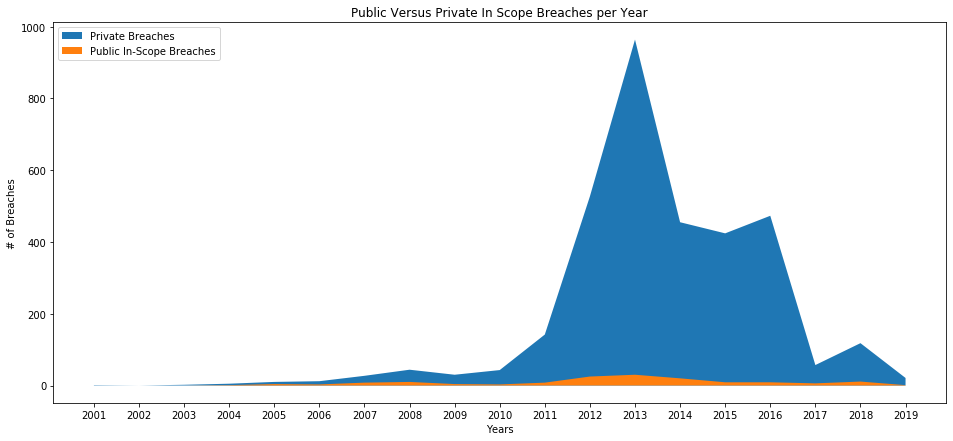

In [217]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.fill_between(total_breaches_by_year["Year"], 0, total_breaches_by_year["# of Breaches"], label='Private Breaches')
ax1.legend(loc="upper left")
ax1.fill_between(public_breaches_by_year["Year"], 0, public_breaches_by_year["# of Breaches"], label='Public In-Scope Breaches')
ax1.legend(loc="upper left")
plt.xlabel('Years')
plt.ylabel('# of Breaches')
plt.title('Public Versus Private In Scope Breaches per Year')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-versus-private-per-year.png')

Breaches by Industry

In [218]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
industry_index = csv_headers.index("Industry2")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

# use a set to only identify each element once
industries = set()

# Get the number of years
for breach in csv_reader:
    if breach[industry_index] != "":
        industries.add(breach[industry_index].capitalize())

# Convert set to list for sorting
industries = list(industries)
industries.sort()

breach_numbers_dict = {}
for industry in industries:
    breach_numbers_dict[industry] = 0

# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")


for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    
    if is_public == "TRUE" and pub_date is not "" and is_in_scope == "TRUE":
        breach_numbers_dict[breach[industry_index].capitalize()] += 1

industry_datapoint = []
# Flatten our dict into the forms needed
for industry, industry_data in breach_numbers_dict.items():
    industry_datapoint.append([industry, industry_data])

headers = ['Industry', 'Public Breaches']
df = pd.DataFrame(industry_datapoint, columns=headers)
print(df)

         Industry  Public Breaches
0      Consulting                4
1       Education                1
2         Finance               41
3            Food                9
4      Healthcare               27
5   Manufacturing                6
6           Media                5
7          Retail               11
8        Services                3
9            Tech               41
10         Travel                4


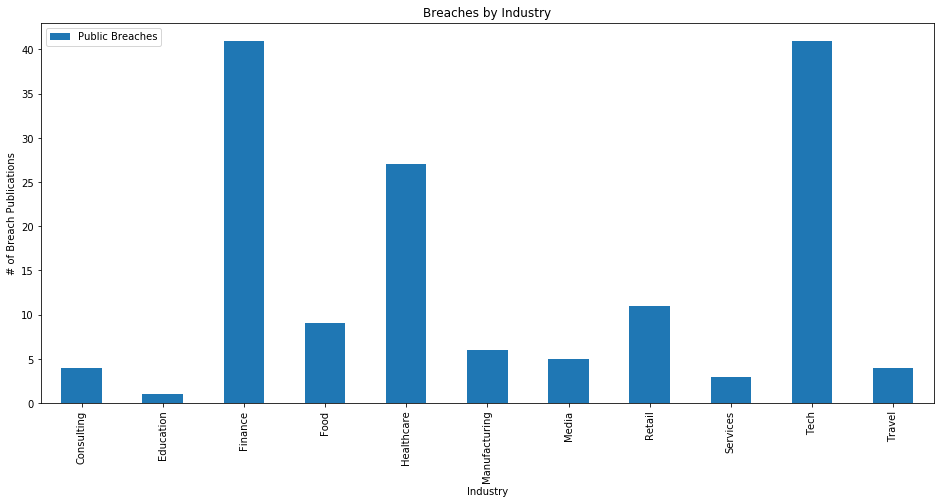

In [219]:
df.loc[:,headers].plot.bar(x="Industry", stacked=True, figsize=(16,7))
plt.ylabel('# of Breach Publications')
#plt.xlabel('Industry')
plt.title('Breaches by Industry')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-by-industry.png', bbox_inches='tight', dpi=300)


Size of Breaches

In [220]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
size_index = csv_headers.index("Size")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

size_categories = { "unknown": [0], "<100K": [0], "<1,000,000": [0], "<100,000,000": [0], "<500,000,000": [0], ">500,000,000": [0]}

for breach in csv_reader:
    size = breach[size_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_public = False
    pub_date = breach[pub_index]
    public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    if is_in_scope == "TRUE" and pub_date is not "":
        is_public = True
    try:
        size = int(size.replace(',', ''))
    except ValueError:
        if is_public:
            size_categories["unknown"][0] +=1
            continue
        else:
            continue
    if size < 100000:
        if is_public:
            size_categories["<100K"][0] +=1
    elif size >= 100000 and size < 1000000 :
        if is_public:
            size_categories["<1,000,000"][0] +=1
    elif size >= 1000000 and size < 100000000 :
        if is_public:
            size_categories["<100,000,000"][0] +=1
    elif size >= 100000000 and size < 500000000 :
        if is_public:
            size_categories["<500,000,000"][0] +=1
    else:
        if is_public:
            size_categories[">500,000,000"][0] +=1

# convert into the format needed for dataframe
size_datapoint = []
# Flatten our dict into the forms needed
for size, size_data in size_categories.items():
    size_datapoint.append([size, size_data[0]])

headers = ['Size', 'Public Breaches']
df = pd.DataFrame(size_datapoint, columns=headers)
print(df)

           Size  Public Breaches
0       unknown               13
1         <100K               64
2    <1,000,000               33
3  <100,000,000               37
4  <500,000,000                4
5  >500,000,000                1


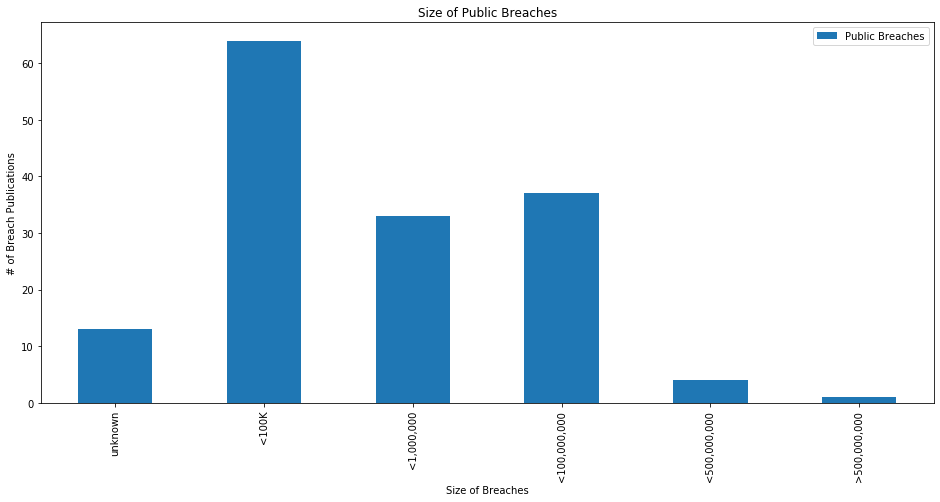

In [221]:
df.loc[:,headers].plot.bar(x="Size", stacked=False, figsize=(16,7))
plt.ylabel('# of Breach Publications')
plt.xlabel('Size of Breaches')
plt.title('Size of Public Breaches')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-by-size.png', bbox_inches='tight', dpi=300)

Size of databreach by industry

In [222]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
industry_index = csv_headers.index("Industry2")
size_index = csv_headers.index("Size")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

# Get list of industries
# use a set to only identify each element once
industries = set()

# Get the number of years
for breach in csv_reader:
    is_in_scope = breach[in_scope_index]
    if is_in_scope != "TRUE":
        continue
        
    industries.add(breach[industry_index])

# Convert set to list for sorting
industries = list(industries)
industries.sort()

industry_default = ([0] * len(industries))

industry_catagories = {}
for industry in industries:
    industry_catagories[industry] = [0,0,0,0,0,0]

# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    size = breach[size_index]
    industry = breach[industry_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    
    if is_in_scope != "TRUE":
        continue
        
    # I still find this approach ugly
    try:
        size = int(size.replace(',', ''))
    except ValueError:
        industry_catagories[industry][0] +=1
        continue
        
    # Get index of industry into industries list
    industry_lookup_index = industries.index(industry)
    if size < 100000:
        industry_catagories[industry][1] +=1
    elif size >= 100000 and size < 1000000 :
        industry_catagories[industry][2] +=1
    elif size >= 1000000 and size < 100000000 :
        industry_catagories[industry][3] +=1
    elif size >= 100000000 and size < 500000000 :
        industry_catagories[industry][4] +=1
    else:
        industry_catagories[industry][5] +=1
        
# convert into the format needed for dataframe
industry_datapoint = []
# Flatten our dict into the forms needed
for industry, size_data in industry_catagories.items():
    industry_datapoint.append([industry] + size_data)

headers = ['Industry', "Unknown", "<100K", "<1,000,000", "<100,000,000", "<500,000,000", ">500,000,000",  ]
df = pd.DataFrame(industry_datapoint, columns=headers)
print(df)

         Industry  Unknown  <100K  <1,000,000  <100,000,000  <500,000,000  \
0      consulting        1      3           0             0             0   
1       education        0      1           0             0             0   
2         finance        2     17          11            10             1   
3            food        2      6           1             0             0   
4      healthcare        2     18           4             3             0   
5   manufacturing        0      3           1             2             0   
6           media        0      2           0             3             0   
7          retail        2      1           2             5             1   
8        services        0      3           0             0             0   
9            tech        4      9          12            14             2   
10         travel        0      1           2             0             0   

    >500,000,000  
0              0  
1              0  
2              0  

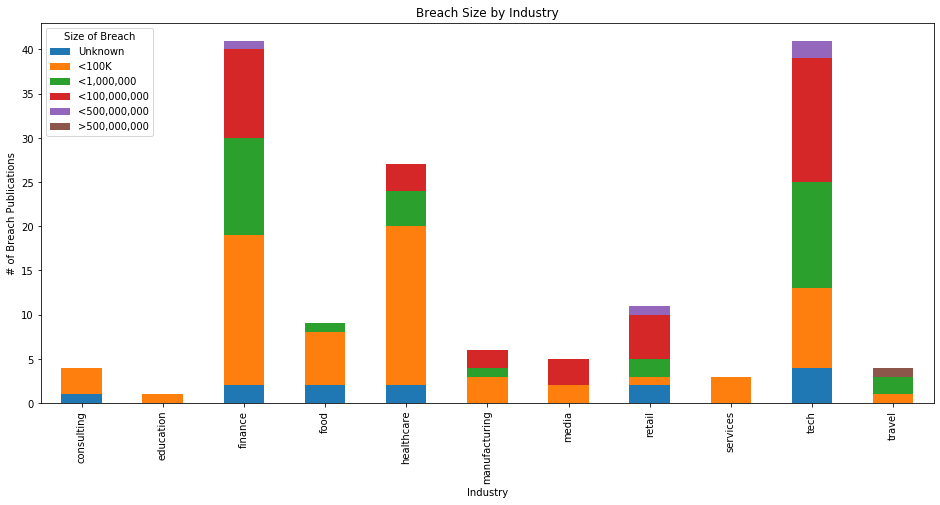

In [223]:
df.loc[:,headers].plot.bar(x="Industry", stacked=True, figsize=(16,7))
plt.ylabel('# of Breach Publications')
plt.xlabel('Industry')
plt.legend(title="Size of Breach")
plt.title('Breach Size by Industry')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-by-size-and-industry.png', bbox_inches='tight', dpi=300)

Breach Size by Year (Public Only)

In [268]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
year_index = csv_headers.index("Year")
size_index = csv_headers.index("Size")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

# use a set to only identify each element once
years = set()

# Get the number of years
for breach in csv_reader:
    year = breach[year_index]
    years.add(str(year))

# sort our years
years = list(years)
years.sort()

year_catagories = {}
year_totals = {}

for year in years:
    year_catagories[year] = [0,0,0,0,0,0]
    year_totals[year] = 0
    
# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    size = breach[size_index]
    year = breach[year_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    
    if is_in_scope != "TRUE":
        continue

    # I still find this approach ugly
    try:
        size = int(size.replace(',', ''))
    except ValueError:
        year_catagories[year][0] +=1
        continue

    if size < 100000:
        year_catagories[year][1] +=1
        year_totals[year] += size
    elif size >= 100000 and size < 1000000:
        year_catagories[year][2] +=1
        year_totals[year] += size
    elif size >= 1000000 and size < 100000000:
        year_catagories[year][3] +=1
        year_totals[year] += size
    elif size >= 100000000 and size < 500000000:
        year_catagories[year][4] +=1
        year_totals[year] += size
    else:
        year_catagories[year][5] +=1
        year_totals[year] += size
print(count)   
# convert into the format needed for dataframe
year_datapoint = []
# Flatten our dict into the forms needed
for year, size_data in year_catagories.items():
    year_datapoint.append([year] + size_data)

headers = ['Year', "Unknown", "<100K", "<1,000,000", "<100,000,000", "<500,000,000", ">500,000,000" ]
df = pd.DataFrame(year_datapoint, columns=headers)
print(df)
year_totals_df = pd.DataFrame(list(year_totals.items()), columns=['Years', 'Total Breaches'])
print(year_totals_df)

152
    Year  Unknown  <100K  <1,000,000  <100,000,000  <500,000,000  >500,000,000
0   2001        0      0           0             0             0             0
1   2003        0      0           0             1             0             0
2   2004        0      0           0             0             0             0
3   2005        0      0           3             3             0             0
4   2006        0      0           2             1             0             0
5   2007        0      5           1             2             0             0
6   2008        0      3           2             3             0             0
7   2009        0      2           1             0             0             0
8   2010        0      1           2             1             0             0
9   2011        1      5           3             4             0             0
10  2012        4     12           5             4             0             0
11  2013        2     17           4            

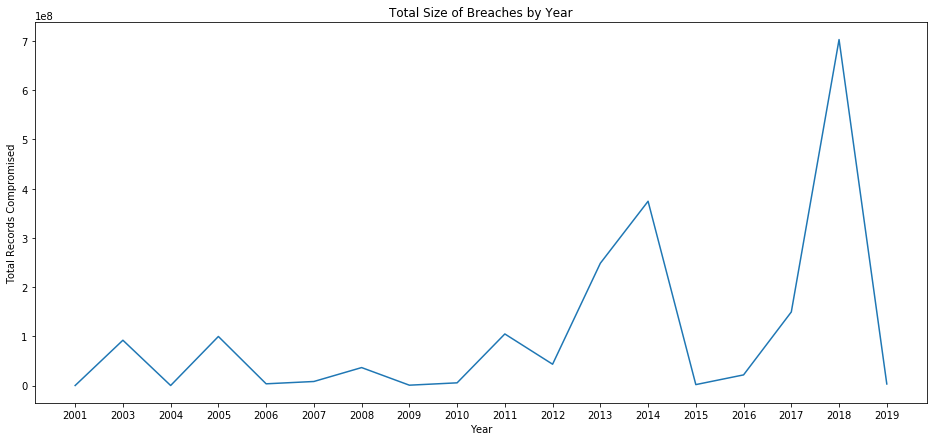

In [262]:

plt.rcParams['figure.figsize'] = [16, 7]
plt.ylabel('Total Records Compromised')
plt.xlabel('Year')
plt.title('Total Size of Breaches by Year')
dates = list(year_totals.keys())           # list() needed for python 3.x
prices = list(year_totals.values())        # ditto
plt.plot_date(dates, prices, '-') # this will show date at the x-axis
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/total-size-of-breaches-by-year.png', bbox_inches='tight', dpi=300)


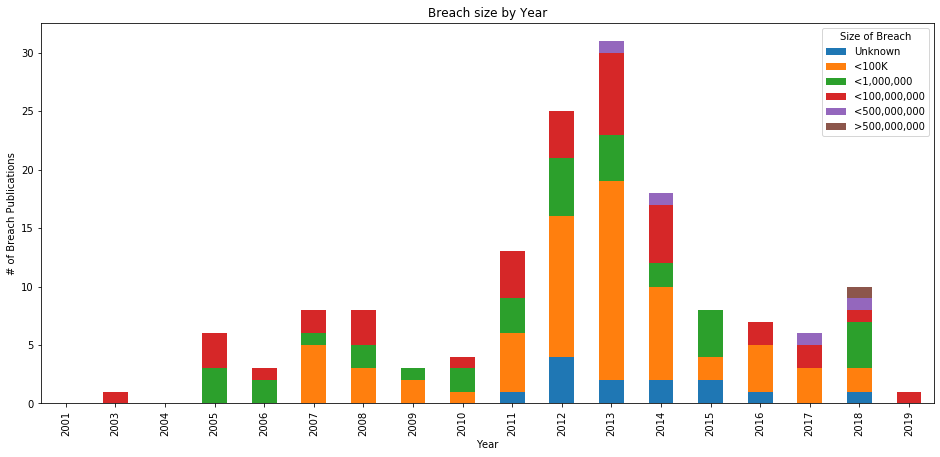

In [225]:
df.loc[:,headers].plot.bar(x="Year", stacked=True, figsize=(16,7))
plt.ylabel('# of Breach Publications')
plt.xlabel('Year')
plt.legend(title="Size of Breach")
plt.title('Breach size by Year')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-by-size-and-year.png', bbox_inches='tight', dpi=300)

Breach by Style

In [226]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
style_index = csv_headers.index("Style")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

# use a set to only identify each element once
styles = set()

# Get the number of years
for breach in csv_reader:
    is_in_scope = breach[in_scope_index]
    
    if is_in_scope != "TRUE":
        continue
    style = breach[style_index]
    styles.add(str(style))

# sort our years
style = list(style)
style.sort()

style_catagories = {}
for style in styles:
    style_catagories[style] = 0

# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    is_in_scope = breach[in_scope_index]
    
    if is_in_scope != "TRUE":
        continue

    style = breach[style_index]
    style_catagories[style] +=1
        
breaches_by_style = pd.DataFrame(style_catagories.items(), columns=['Style', '# of Breaches'])
print(breaches_by_style)

  Style  # of Breaches
0  STAT              1
1  CARD              6
2  HACK             63
3  UNKN              1
4  INSD             13
5  PHYS              5
6  PORT             27
7  DISC             36


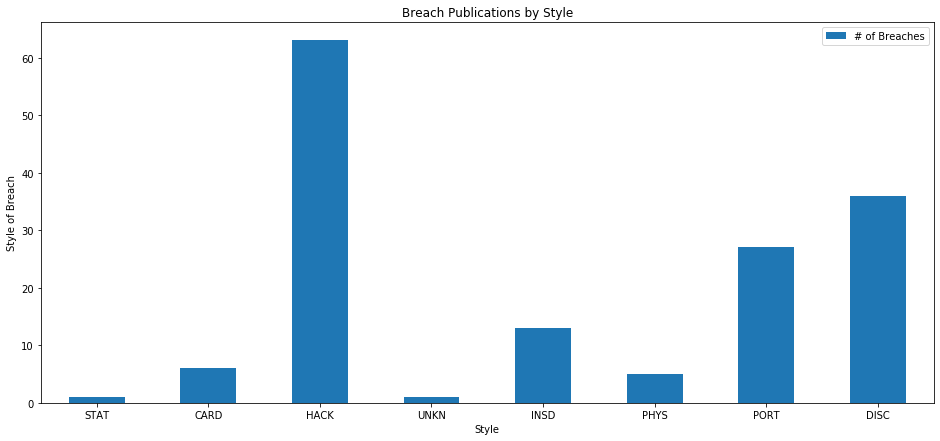

In [227]:
# Change the output image size
plt.rcParams['figure.figsize'] = [16, 7]
# Generate our bar graph
ax = breaches_by_style.plot.bar(x='Style', y='# of Breaches', rot=0)
plt.ylabel('# of Breaches')
plt.ylabel('Style of Breach')
plt.title('Breach Publications by Style')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-by-style.png', bbox_inches='tight', dpi=300)

Day before versus Day of Announcment % Change

In [258]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

def get_day_before_and_breach_day(symbol, breach_date, nasdaq_df):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    breach_date = breachday.strftime("%Y-%m-%d")
    # check if we're on a weekend
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
        breach_date = breachday.strftime("%Y-%m-%d")
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
    
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == breach_date].tolist()
    while nasdaq_breach_index == []:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == breach_date].tolist()
    
    nasdaq_breach_index = nasdaq_breach_index[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['close']

    price_on_before_breach_day = stock_df.iloc[stock_breach_index-1]['close']
    nasdaq_on_before_breach_day = nasdaq_df.iloc[nasdaq_breach_index-1]['close']
    
    stock_per_change = ((price_on_breach_day-price_on_before_breach_day)/price_on_before_breach_day)*100
    nasdaq_per_change = ((nasdaq_on_breach_day-nasdaq_on_before_breach_day)/nasdaq_on_before_breach_day)*100
    adjusted_per_change = (((price_on_breach_day)/(price_on_before_breach_day)-1)*100) - (((nasdaq_on_breach_day)/(nasdaq_on_before_breach_day)-1)*100)
    
    return [symbol, stock_per_change, nasdaq_per_change, adjusted_per_change]
    
def read_nasdaq():
    base_path = "data/^IXIC-daydata.csv"
    nasdaq_df = pd.read_csv(base_path)
    return nasdaq_df

# Get the NASDAQ data for all time
nasdaq_df = read_nasdaq()
stock_stats_collection = []
# For each breach, check the market and breach data
for breach in csv_reader:
    symbol = breach[symbol_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    # Check if it is public and we have data on it otherwise skip
    if is_public == "TRUE" and is_in_scope == "TRUE":
        stock_stats_collection.append(get_day_before_and_breach_day(symbol, pub_date, nasdaq_df))
    else:
        continue
        
headers = ['', "Stock % Change", "NASDAQ % Change", "Adjusted % Change" ]
df = pd.DataFrame(stock_stats_collection, columns=headers)

output_data = []
mean_data = ['Mean', df["Stock % Change"].mean(), df["NASDAQ % Change"].mean(), df["Adjusted % Change"].mean()]
output_data.append(mean_data)
median_data = ['Median', df["Stock % Change"].median(), df["NASDAQ % Change"].median(), df["Adjusted % Change"].median()]
output_data.append(median_data)
stddev_data = ['StdDev', df["Stock % Change"].std(), df["NASDAQ % Change"].std(), df["Adjusted % Change"].std()]
output_data.append(stddev_data)

print("% Change after One Day")
df = pd.DataFrame(output_data, columns=headers)
print(df)





% Change after One Day
           Stock % Change  NASDAQ % Change  Adjusted % Change
0    Mean       -0.012930         0.068654          -0.081584
1  Median        0.156641         0.007077           0.041188
2  StdDev        2.094397         1.128576           1.818132


Day of Breach versus One Week % Change

In [59]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
remaining_index = csv_headers.index("Remaining")

def get_day_of_and_week_after(symbol, breach_date, nasdaq_df):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    breach_date = breachday.strftime("%Y-%m-%d")
    # check if we're on a weekend
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
        breach_date = breachday.strftime("%Y-%m-%d")
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
    
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    while nasdaq_breach_index == []:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    
    nasdaq_breach_index = nasdaq_breach_index[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['4. close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['Close']

    price_week_after_breach_day = stock_df.iloc[stock_breach_index+5]['4. close']
    nasdaq_week_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+5]['Close']
    
    stock_per_change = ((price_week_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    nasdaq_per_change = ((nasdaq_week_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    adjusted_per_change = (((price_week_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_week_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, stock_per_change, nasdaq_per_change, adjusted_per_change]
    
def read_nasdaq():
    base_path = "data/IXIC.csv"
    nasdaq_df = pd.read_csv(base_path)
    compliant_date = []
    for date in nasdaq_df['Date']:
        our_date = datetime.datetime.strptime(date, "%m/%d/%y")
        compliant_date.append(our_date.strftime("%Y-%m-%d"))
    nasdaq_df['compliant'] = compliant_date
    return nasdaq_df

nasdaq_df = read_nasdaq()
stock_stats_collection = []
for breach in csv_reader:
    symbol = breach[symbol_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    still_find = breach[remaining_index]
    # Check if it is public and we have data on it otherwise skip
    if is_public == "TRUE" and pub_date != "":
        stock_stats_collection.append(get_day_of_and_week_after(symbol, pub_date, nasdaq_df))
    else:
        continue
        
headers = ['', "Stock % Change", "NASDAQ % Change", "Adjusted % Change" ]
df = pd.DataFrame(stock_stats_collection, columns=headers)

output_data = []
mean_data = ['Mean', df["Stock % Change"].mean(), df["NASDAQ % Change"].mean(), df["Adjusted % Change"].mean()]
output_data.append(mean_data)
median_data = ['Median', df["Stock % Change"].median(), df["NASDAQ % Change"].median(), df["Adjusted % Change"].median()]
output_data.append(median_data)
stddev_data = ['StdDev', df["Stock % Change"].std(), df["NASDAQ % Change"].std(), df["Adjusted % Change"].std()]
output_data.append(stddev_data)

print("% Change after One Week")
df_one_week = pd.DataFrame(output_data, columns=headers)
print(df_one_week)

ValueError: 'Remaining' is not in list

Day of Breach versus Two Week % Change

In [ ]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
remaining_index = csv_headers.index("Remaining")

def get_day_of_and_two_weeks_after(symbol, breach_date, nasdaq_df):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    breach_date = breachday.strftime("%Y-%m-%d")
    # check if we're on a weekend
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
        breach_date = breachday.strftime("%Y-%m-%d")
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
    
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    while nasdaq_breach_index == []:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    
    nasdaq_breach_index = nasdaq_breach_index[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['4. close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['Close']

    price_two_weeks_after_breach_day = stock_df.iloc[stock_breach_index+10]['4. close']
    nasdaq_two_weeks_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+10]['Close']
    
    stock_per_change = ((price_two_weeks_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    nasdaq_per_change = ((nasdaq_two_weeks_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    adjusted_per_change = (((price_two_weeks_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_two_weeks_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, stock_per_change, nasdaq_per_change, adjusted_per_change]
    
def read_nasdaq():
    base_path = "data/IXIC.csv"
    nasdaq_df = pd.read_csv(base_path)
    compliant_date = []
    for date in nasdaq_df['Date']:
        our_date = datetime.datetime.strptime(date, "%m/%d/%y")
        compliant_date.append(our_date.strftime("%Y-%m-%d"))
    nasdaq_df['compliant'] = compliant_date
    return nasdaq_df

nasdaq_df = read_nasdaq()
stock_stats_collection = []
for breach in csv_reader:
    symbol = breach[symbol_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    still_find = breach[remaining_index]
    # Check if it is public and we have data on it otherwise skip
    if is_public == "TRUE" and pub_date != "" and still_find != "TRUE":
        stock_stats_collection.append(get_day_of_and_two_weeks_after(symbol, pub_date, nasdaq_df))
    else:
        continue
        
headers = ['', "Stock % Change", "NASDAQ % Change", "Adjusted % Change" ]
df = pd.DataFrame(stock_stats_collection, columns=headers)

output_data = []
mean_data = ['Mean', df["Stock % Change"].mean(), df["NASDAQ % Change"].mean(), df["Adjusted % Change"].mean()]
output_data.append(mean_data)
median_data = ['Median', df["Stock % Change"].median(), df["NASDAQ % Change"].median(), df["Adjusted % Change"].median()]
output_data.append(median_data)
stddev_data = ['StdDev', df["Stock % Change"].std(), df["NASDAQ % Change"].std(), df["Adjusted % Change"].std()]
output_data.append(stddev_data)

print("% Change after Two Weeks")
df_two_weeks = pd.DataFrame(output_data, columns=headers)
print(df_two_weeks)

Day of Breach versus One Month % Change

In [ ]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
remaining_index = csv_headers.index("Remaining")

def get_day_of_and_one_month_after(symbol, breach_date, nasdaq_df):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    breach_date = breachday.strftime("%Y-%m-%d")
    # check if we're on a weekend
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
        breach_date = breachday.strftime("%Y-%m-%d")
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
    
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    while nasdaq_breach_index == []:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    
    nasdaq_breach_index = nasdaq_breach_index[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['4. close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['Close']

    price_one_month_after_breach_day = stock_df.iloc[stock_breach_index+20]['4. close']
    nasdaq_one_month_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+20]['Close']
    
    stock_per_change = ((price_one_month_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    nasdaq_per_change = ((nasdaq_one_month_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    adjusted_per_change = (((price_one_month_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_one_month_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, stock_per_change, nasdaq_per_change, adjusted_per_change]
    
def read_nasdaq():
    base_path = "data/IXIC.csv"
    nasdaq_df = pd.read_csv(base_path)
    compliant_date = []
    for date in nasdaq_df['Date']:
        our_date = datetime.datetime.strptime(date, "%m/%d/%y")
        compliant_date.append(our_date.strftime("%Y-%m-%d"))
    nasdaq_df['compliant'] = compliant_date
    return nasdaq_df

nasdaq_df = read_nasdaq()
stock_stats_collection = []
for breach in csv_reader:
    symbol = breach[symbol_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    still_find = breach[remaining_index]
    # Check if it is public and we have data on it otherwise skip
    if is_public == "TRUE" and pub_date != "" and still_find != "TRUE":
        stock_stats_collection.append(get_day_of_and_one_month_after(symbol, pub_date, nasdaq_df))
    else:
        continue
        
headers = ['', "Stock % Change", "NASDAQ % Change", "Adjusted % Change" ]
df = pd.DataFrame(stock_stats_collection, columns=headers)

output_data = []
mean_data = ['Mean', df["Stock % Change"].mean(), df["NASDAQ % Change"].mean(), df["Adjusted % Change"].mean()]
output_data.append(mean_data)
median_data = ['Median', df["Stock % Change"].median(), df["NASDAQ % Change"].median(), df["Adjusted % Change"].median()]
output_data.append(median_data)
stddev_data = ['StdDev', df["Stock % Change"].std(), df["NASDAQ % Change"].std(), df["Adjusted % Change"].std()]
output_data.append(stddev_data)

print("% Change after One Month")
df_one_month = pd.DataFrame(output_data, columns=headers)
print(df_one_month)

Day of Breach versus One Year % Change

In [ ]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
remaining_index = csv_headers.index("Remaining")

def get_day_of_and_one_year_after(symbol, breach_date, nasdaq_df):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    breach_date = breachday.strftime("%Y-%m-%d")
    # check if we're on a weekend
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
        breach_date = breachday.strftime("%Y-%m-%d")
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
    
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    while nasdaq_breach_index == []:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    
    nasdaq_breach_index = nasdaq_breach_index[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['4. close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['Close']
    # Some of these data points don't exist
    try:
        price_one_year_after_breach_day = stock_df.iloc[stock_breach_index+260]['4. close']
        nasdaq_one_year_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+260]['Close']
    except IndexError:
        price_one_year_after_breach_day = np.nan
        nasdaq_one_year_after_breach_day = np.nan
        
    stock_per_change = ((price_one_year_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    nasdaq_per_change = ((nasdaq_one_year_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    adjusted_per_change = (((price_one_year_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_one_year_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, stock_per_change, nasdaq_per_change, adjusted_per_change]
    
def read_nasdaq():
    base_path = "data/IXIC.csv"
    nasdaq_df = pd.read_csv(base_path)
    compliant_date = []
    for date in nasdaq_df['Date']:
        our_date = datetime.datetime.strptime(date, "%m/%d/%y")
        compliant_date.append(our_date.strftime("%Y-%m-%d"))
    nasdaq_df['compliant'] = compliant_date
    return nasdaq_df

nasdaq_df = read_nasdaq()
stock_stats_collection = []
for breach in csv_reader:
    symbol = breach[symbol_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    still_find = breach[remaining_index]
    # Check if it is public and we have data on it otherwise skip
    if is_public == "TRUE" and pub_date != "" and still_find != "TRUE":
        stock_stats_collection.append(get_day_of_and_one_year_after(symbol, pub_date, nasdaq_df))
    else:
        continue
        
headers = ['', "Stock % Change", "NASDAQ % Change", "Adjusted % Change" ]
df = pd.DataFrame(stock_stats_collection, columns=headers)

output_data = []
mean_data = ['Mean', df["Stock % Change"].mean(), df["NASDAQ % Change"].mean(), df["Adjusted % Change"].mean()]
output_data.append(mean_data)
median_data = ['Median', df["Stock % Change"].median(), df["NASDAQ % Change"].median(), df["Adjusted % Change"].median()]
output_data.append(median_data)
stddev_data = ['StdDev', df["Stock % Change"].std(), df["NASDAQ % Change"].std(), df["Adjusted % Change"].std()]
output_data.append(stddev_data)

print("% Change after One Year")
df_one_year = pd.DataFrame(output_data, columns=headers)
print(df_one_year)

Day of Breach versus Two Year % Change

In [ ]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
remaining_index = csv_headers.index("Remaining")

def get_day_of_and_two_years_after(symbol, breach_date, nasdaq_df):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    breach_date = breachday.strftime("%Y-%m-%d")
    # check if we're on a weekend
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
        breach_date = breachday.strftime("%Y-%m-%d")
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
    
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    while nasdaq_breach_index == []:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    
    nasdaq_breach_index = nasdaq_breach_index[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['4. close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['Close']
    # Some of these data points don't exist
    try:
        price_two_years_after_breach_day = stock_df.iloc[stock_breach_index+520]['4. close']
        nasdaq_two_years_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+520]['Close']
    except IndexError:
        price_two_years_after_breach_day = np.nan
        nasdaq_two_years_after_breach_day = np.nan
        
    stock_per_change = ((price_two_years_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    nasdaq_per_change = ((nasdaq_two_years_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    adjusted_per_change = (((price_two_years_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_two_years_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, stock_per_change, nasdaq_per_change, adjusted_per_change]
    
def read_nasdaq():
    base_path = "data/IXIC.csv"
    nasdaq_df = pd.read_csv(base_path)
    compliant_date = []
    for date in nasdaq_df['Date']:
        our_date = datetime.datetime.strptime(date, "%m/%d/%y")
        compliant_date.append(our_date.strftime("%Y-%m-%d"))
    nasdaq_df['compliant'] = compliant_date
    return nasdaq_df

nasdaq_df = read_nasdaq()
stock_stats_collection = []
for breach in csv_reader:
    symbol = breach[symbol_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    still_find = breach[remaining_index]
    # Check if it is public and we have data on it otherwise skip
    if is_public == "TRUE" and pub_date != "" and still_find != "TRUE":
        stock_stats_collection.append(get_day_of_and_two_years_after(symbol, pub_date, nasdaq_df))
    else:
        continue
        
headers = ['', "Stock % Change", "NASDAQ % Change", "Adjusted % Change" ]
df = pd.DataFrame(stock_stats_collection, columns=headers)

output_data = []
mean_data = ['Mean', df["Stock % Change"].mean(), df["NASDAQ % Change"].mean(), df["Adjusted % Change"].mean()]
output_data.append(mean_data)
median_data = ['Median', df["Stock % Change"].median(), df["NASDAQ % Change"].median(), df["Adjusted % Change"].median()]
output_data.append(median_data)
stddev_data = ['StdDev', df["Stock % Change"].std(), df["NASDAQ % Change"].std(), df["Adjusted % Change"].std()]
output_data.append(stddev_data)

print("% Change after Two Years")
df_two_years = pd.DataFrame(output_data, columns=headers)
print(df_two_years)

Day of Breach versus Three Year % Change

In [ ]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
remaining_index = csv_headers.index("Remaining")

def get_day_of_and_three_years_after(symbol, breach_date, nasdaq_df):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    breach_date = breachday.strftime("%Y-%m-%d")
    # check if we're on a weekend
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
        breach_date = breachday.strftime("%Y-%m-%d")
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
    
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    while nasdaq_breach_index == []:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    
    nasdaq_breach_index = nasdaq_breach_index[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['4. close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['Close']
    # Some of these data points don't exist
    try:
        price_three_years_after_breach_day = stock_df.iloc[stock_breach_index+780]['4. close']
        nasdaq_three_years_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+780]['Close']
    except IndexError:
        price_three_years_after_breach_day = np.nan
        nasdaq_three_years_after_breach_day = np.nan
        
    stock_per_change = ((price_three_years_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    nasdaq_per_change = ((nasdaq_three_years_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    adjusted_per_change = (((price_three_years_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_three_years_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, stock_per_change, nasdaq_per_change, adjusted_per_change]
    
def read_nasdaq():
    base_path = "data/IXIC.csv"
    nasdaq_df = pd.read_csv(base_path)
    compliant_date = []
    for date in nasdaq_df['Date']:
        our_date = datetime.datetime.strptime(date, "%m/%d/%y")
        compliant_date.append(our_date.strftime("%Y-%m-%d"))
    nasdaq_df['compliant'] = compliant_date
    return nasdaq_df

nasdaq_df = read_nasdaq()
stock_stats_collection = []
for breach in csv_reader:
    symbol = breach[symbol_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    still_find = breach[remaining_index]
    # Check if it is public and we have data on it otherwise skip
    if is_public == "TRUE" and pub_date != "" and still_find != "TRUE":
        stock_stats_collection.append(get_day_of_and_three_years_after(symbol, pub_date, nasdaq_df))
    else:
        continue
        
headers = ['', "Stock % Change", "NASDAQ % Change", "Adjusted % Change" ]
df = pd.DataFrame(stock_stats_collection, columns=headers)

output_data = []
mean_data = ['Mean', df["Stock % Change"].mean(), df["NASDAQ % Change"].mean(), df["Adjusted % Change"].mean()]
output_data.append(mean_data)
median_data = ['Median', df["Stock % Change"].median(), df["NASDAQ % Change"].median(), df["Adjusted % Change"].median()]
output_data.append(median_data)
stddev_data = ['StdDev', df["Stock % Change"].std(), df["NASDAQ % Change"].std(), df["Adjusted % Change"].std()]
output_data.append(stddev_data)

print("% Change after Three Years")
df_three_years = pd.DataFrame(output_data, columns=headers)
print(df_three_years)

Graph of Adjusted % Change over three years

In [ ]:

x_values = ["One Week", "Two Weeks", "One Month", "One Year", "Two Years", "Three Years"]
means = [df_one_week["Adjusted % Change"][0], df_two_weeks["Adjusted % Change"][0], df_one_month["Adjusted % Change"][0], df_one_year["Adjusted % Change"][0], df_two_years["Adjusted % Change"][0], df_three_years["Adjusted % Change"][0]]
stdd_lower = [df_one_week["Adjusted % Change"][0]-df_one_week["Adjusted % Change"][2], df_two_weeks["Adjusted % Change"][0]-df_two_weeks["Adjusted % Change"][2], df_one_month["Adjusted % Change"][0]-df_one_month["Adjusted % Change"][2], df_one_year["Adjusted % Change"][0]-df_one_year["Adjusted % Change"][2], df_two_years["Adjusted % Change"][0]-df_two_years["Adjusted % Change"][2], df_three_years["Adjusted % Change"][0]-df_three_years["Adjusted % Change"][2]]
stdd_upper = [df_one_week["Adjusted % Change"][0]+df_one_week["Adjusted % Change"][2], df_two_weeks["Adjusted % Change"][0]+df_two_weeks["Adjusted % Change"][2], df_one_month["Adjusted % Change"][0]+df_one_month["Adjusted % Change"][2], df_one_year["Adjusted % Change"][0]+df_one_year["Adjusted % Change"][2], df_two_years["Adjusted % Change"][0]+df_two_years["Adjusted % Change"][2], df_three_years["Adjusted % Change"][0]+df_three_years["Adjusted % Change"][2]]

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(x_values, means, label='Adjusted Mean')
ax1.plot(x_values, stdd_lower, label='StdDev', color='black', linestyle="--")
ax1.plot(x_values, stdd_upper, color='black', linestyle="--")

plt.xticks(x_values)
plt.xlabel('Time Since Breach')
plt.ylabel('% Change Since Breach')
plt.title('Adjusted % Change (all stocks) Over Three Years')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper left')

Graph of Adjusted % Change over one year

In [ ]:

x_values = ["One Week", "Two Weeks", "One Month", "One Year"]
means = [df_one_week["Adjusted % Change"][0], df_two_weeks["Adjusted % Change"][0], df_one_month["Adjusted % Change"][0], df_one_year["Adjusted % Change"][0]]
stdd_lower = [df_one_week["Adjusted % Change"][0]-df_one_week["Adjusted % Change"][2], df_two_weeks["Adjusted % Change"][0]-df_two_weeks["Adjusted % Change"][2], df_one_month["Adjusted % Change"][0]-df_one_month["Adjusted % Change"][2], df_one_year["Adjusted % Change"][0]-df_one_year["Adjusted % Change"][2]]
stdd_upper = [df_one_week["Adjusted % Change"][0]+df_one_week["Adjusted % Change"][2], df_two_weeks["Adjusted % Change"][0]+df_two_weeks["Adjusted % Change"][2], df_one_month["Adjusted % Change"][0]+df_one_month["Adjusted % Change"][2], df_one_year["Adjusted % Change"][0]+df_one_year["Adjusted % Change"][2]]

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(x_values, means, label='Adjusted Mean')
ax1.plot(x_values, stdd_lower, label='StdDev', color='black', linestyle="--")
ax1.plot(x_values, stdd_upper, color='black', linestyle="--")

plt.xticks(x_values)
plt.xlabel('Time Since Breach')
plt.ylabel('% Change Since Breach')
plt.title('Adjusted % Change (all stocks) Over Three Years')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper left')

Distribution of Adjusted % Change by Company Over Three Years

In [ ]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
remaining_index = csv_headers.index("Remaining")

def get_data_over_time(symbol, breach_date, nasdaq_df):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    breach_date = breachday.strftime("%Y-%m-%d")
    # check if we're on a weekend
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
        breach_date = breachday.strftime("%Y-%m-%d")
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
    
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    while nasdaq_breach_index == []:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    
    nasdaq_breach_index = nasdaq_breach_index[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['4. close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['Close']
    
    # Some of these data points don't exist
    price_one_week_after_breach_day = stock_df.iloc[stock_breach_index+5]['4. close']
    nasdaq_one_week_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+5]['Close']
    price_two_weeks_after_breach_day = stock_df.iloc[stock_breach_index+10]['4. close']
    nasdaq_two_weeks_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+10]['Close']
    price_one_month_after_breach_day = stock_df.iloc[stock_breach_index+20]['4. close']
    nasdaq_one_month_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+20]['Close']
    try:
        price_one_year_after_breach_day = stock_df.iloc[stock_breach_index+260]['4. close']
        nasdaq_one_year_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+260]['Close']
    except IndexError:
        price_one_year_after_breach_day = np.nan
        nasdaq_one_year_after_breach_day = np.nan
    try:
        price_two_years_after_breach_day = stock_df.iloc[stock_breach_index+520]['4. close']
        nasdaq_two_years_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+520]['Close']
    except IndexError:
        price_two_years_after_breach_day = np.nan
        nasdaq_two_years_after_breach_day = np.nan
    try:
        price_three_years_after_breach_day = stock_df.iloc[stock_breach_index+780]['4. close']
        nasdaq_three_years_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+780]['Close']
    except IndexError:
        price_three_years_after_breach_day = np.nan
        nasdaq_three_years_after_breach_day = np.nan

    apc_one_week = (((price_one_week_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_one_week_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    apc_two_weeks = (((price_two_weeks_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_two_weeks_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    apc_one_month = (((price_one_month_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_one_month_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    apc_one_year = (((price_one_year_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_one_year_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    apc_two_years = (((price_two_years_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_two_years_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    apc_three_years = (((price_three_years_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_three_years_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, apc_one_week, apc_two_weeks, apc_one_month, apc_one_year, apc_two_years, apc_three_years]
    
def read_nasdaq():
    base_path = "data/IXIC.csv"
    nasdaq_df = pd.read_csv(base_path)
    compliant_date = []
    for date in nasdaq_df['Date']:
        our_date = datetime.datetime.strptime(date, "%m/%d/%y")
        compliant_date.append(our_date.strftime("%Y-%m-%d"))
    nasdaq_df['compliant'] = compliant_date
    return nasdaq_df

nasdaq_df = read_nasdaq()
stock_stats_collection = []
for breach in csv_reader:
    symbol = breach[symbol_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    still_find = breach[remaining_index]
    # Check if it is public and we have data on it otherwise skip
    if is_public == "TRUE" and pub_date != "" and still_find != "TRUE":
        stock_stats_collection.append(get_data_over_time(symbol, pub_date, nasdaq_df))
    else:
        continue
        
headers = ['Symbol', "One Week", "Two Weeks", "One Month", "One Year", "Two Years", "Three Years" ]
headers = [1, 2, 3, 4, 5, 6, 7]
df = pd.DataFrame(stock_stats_collection, columns=headers)

print(df)

In [ ]:
x_values = [1, 2, 3, 4, 5, 6]
groups = []
sets = []
for row in df.iterrows():
    # Outlier that throws off the graph axis
    if(row[1][1] == "BET"):
        continue
    y_values = np.array([row[1][2],row[1][3],row[1][4],row[1][5],row[1][6], row[1][7]])
    groups.append(row[1][1])
    sets.append((x_values, y_values))
data = tuple(sets)
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
plt.axhline(y=0, color='r', linestyle='-')
plt.ylim(top=400, bottom=-400)
ax.xaxis.tick_top()
x = [1, 2, 3, 4, 5, 6]
for data, group in zip(data, groups):
    x, y = data
    ax.scatter(x, y, edgecolors='none', s=30, label=group)

plt.legend(loc=8, bbox_to_anchor=(0.5, -0.1), ncol=10, fontsize=8)


plt.title('Distribution of Adjusted % Change by Company Over Three Years', y=1.07)
plt.ylabel('Adjusted Stock % change since breach')
plt.xlabel('Market Days since Breach')
my_xticks = ['', 'One Week','Two Weeks','One Month','One Year', 'Two Years', 'Three Years', '']
ax.xaxis.set_ticklabels(my_xticks)


Distribution of Adjusted % Change by Company Over Two Weeks

In [ ]:
x_values = [0, 1]
groups = []
sets = []
for row in df.iterrows():
    y_values = np.array([row[1][2], row[1][3]])
    groups.append(row[1][1])
    sets.append((x_values, y_values))
data = tuple(sets)
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
plt.axhline(y=0, color='r', linestyle='-')
ax.xaxis.tick_top()
x = [0, 1]
for data, group in zip(data, groups):
    x, y = data
    ax.scatter(x, y, edgecolors='none', s=30, label=group)

plt.legend(loc=8, bbox_to_anchor=(0.5, -0.1), ncol=10, fontsize=8)


plt.title('Distribution of Adjusted % Change by Company Over Two Weeks', y=1.07)
plt.ylabel('Adjusted Stock % change since breach')
plt.xlabel('Market Days since Breach')
my_xticks = ['', 'One Week', 'Two Weeks']
plt.locator_params(axis='x', nbins=2)
ax.xaxis.set_ticklabels(my_xticks)


% of Stocks that Overperformed the Market

In [ ]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
remaining_index = csv_headers.index("Remaining")

def get_data_over_time(symbol, breach_date, nasdaq_df):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    breach_date = breachday.strftime("%Y-%m-%d")
    # check if we're on a weekend
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
        breach_date = breachday.strftime("%Y-%m-%d")
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
    
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    while nasdaq_breach_index == []:
        breachday = breachday + datetime.timedelta(days=1)
        breach_date = breachday.strftime("%Y-%m-%d")
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['compliant'] == breach_date].tolist()
    
    nasdaq_breach_index = nasdaq_breach_index[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['4. close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['Close']
    
    # Some of these data points don't exist
    price_one_week_after_breach_day = stock_df.iloc[stock_breach_index+5]['4. close']
    nasdaq_one_week_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+5]['Close']
    price_two_weeks_after_breach_day = stock_df.iloc[stock_breach_index+10]['4. close']
    nasdaq_two_weeks_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+10]['Close']
    price_one_month_after_breach_day = stock_df.iloc[stock_breach_index+20]['4. close']
    nasdaq_one_month_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+20]['Close']
    try:
        price_one_year_after_breach_day = stock_df.iloc[stock_breach_index+260]['4. close']
        nasdaq_one_year_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+260]['Close']
    except IndexError:
        price_one_year_after_breach_day = np.nan
        nasdaq_one_year_after_breach_day = np.nan
    try:
        price_two_years_after_breach_day = stock_df.iloc[stock_breach_index+520]['4. close']
        nasdaq_two_years_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+520]['Close']
    except IndexError:
        price_two_years_after_breach_day = np.nan
        nasdaq_two_years_after_breach_day = np.nan
    try:
        price_three_years_after_breach_day = stock_df.iloc[stock_breach_index+780]['4. close']
        nasdaq_three_years_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+780]['Close']
    except IndexError:
        price_three_years_after_breach_day = np.nan
        nasdaq_three_years_after_breach_day = np.nan

    
    spc_one_week = ((price_one_week_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    npc_one_week = ((nasdaq_one_week_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    spc_two_weeks = ((price_two_weeks_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    npc_two_weeks = ((nasdaq_two_weeks_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    spc_one_month = ((price_one_month_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    npc_one_month = ((nasdaq_one_month_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    spc_one_year = ((price_one_year_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    npc_one_year = ((nasdaq_one_year_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    spc_two_years = ((price_two_years_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    npc_two_years = ((nasdaq_two_years_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    spc_three_years = ((price_three_years_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    npc_three_years = ((nasdaq_three_years_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    
    # nan > 123 = False so we need to make sure that we return NaN if its anywhere
    if spc_one_week == np.nan or npc_one_week == np.nan:
        one_week_overperform = np.nan
    else:
        one_week_overperform = (spc_one_week > npc_one_week)
        
    if spc_two_weeks == np.nan or npc_two_weeks == np.nan:
        two_week_overperform = np.nan
    else:
        two_week_overperform = (spc_two_weeks > npc_two_weeks)
        
    if spc_one_month == np.nan or npc_one_month == np.nan:
        one_month_overperform = np.nan
    else:
        one_month_overperform = (spc_one_month > npc_one_month)
        
    if spc_one_year == np.nan or npc_one_year == np.nan:
        one_year_overperform = np.nan
    else:
        one_year_overperform = (spc_one_year > npc_one_year)
        
    if spc_two_years == np.nan or npc_three_years == np.nan:
        two_year_overperform = np.nan
    else:
        two_year_overperform = (spc_two_years > npc_three_years)
        
    if spc_three_years == np.nan or npc_three_years == np.nan:
        three_year_overperform = np.nan
    else:
        three_year_overperform = (spc_three_years > npc_three_years)
        
    return [symbol, one_week_overperform, two_week_overperform, one_month_overperform, one_year_overperform, two_year_overperform, three_year_overperform]
    
def read_nasdaq():
    base_path = "data/IXIC.csv"
    nasdaq_df = pd.read_csv(base_path)
    compliant_date = []
    for date in nasdaq_df['Date']:
        our_date = datetime.datetime.strptime(date, "%m/%d/%y")
        compliant_date.append(our_date.strftime("%Y-%m-%d"))
    nasdaq_df['compliant'] = compliant_date
    return nasdaq_df

nasdaq_df = read_nasdaq()
stock_stats_collection = []
for breach in csv_reader:
    symbol = breach[symbol_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    still_find = breach[remaining_index]
    # Check if it is public and we have data on it otherwise skip
    if is_public == "TRUE" and pub_date != "" and still_find != "TRUE":
        stock_stats_collection.append(get_data_over_time(symbol, pub_date, nasdaq_df))
    else:
        continue
        
headers = ['Symbol', "One Week", "Two Weeks", "One Month", "One Year", "Two Years", "Three Years" ]
df = pd.DataFrame(stock_stats_collection, columns=headers)

print(df)

In [ ]:
number_of_rows = df.shape[0]
count_overper_one_week = np.count_nonzero(df["One Week"])
count_underper_one_week = number_of_rows - np.count_nonzero(df["One Week"])

count_overper_two_week = np.count_nonzero(df["Two Weeks"])
count_underper_two_weeks = number_of_rows - np.count_nonzero(df["Two Weeks"])

count_overper_one_month = np.count_nonzero(df["One Month"])
count_underper_one_month = number_of_rows - np.count_nonzero(df["One Month"])

count_overper_one_year = np.count_nonzero(df["One Year"])
count_underper_one_year = number_of_rows - np.count_nonzero(df["One Year"])

count_overper_two_years = np.count_nonzero(df["Two Years"])
count_underper_two_years = number_of_rows - np.count_nonzero(df["Two Years"])

count_overper_three_years = np.count_nonzero(df["Three Years"])
count_underper_three_years = number_of_rows - np.count_nonzero(df["Three Years"])

x = ['Overperformed', count_overper_one_week, count_overper_two_week, count_overper_one_month, count_overper_one_year, count_overper_two_years, count_overper_three_years]
x = ['UnderPerformed', count_underper_one_week, count_underper_two_weeks, count_underper_one_month, count_overper_one_year, count_overper_two_years, count_underper_three_years]


print(x)